In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data=pd.read_csv('credit.csv')

In [ ]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
data.shape

(100000, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [ ]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
data.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

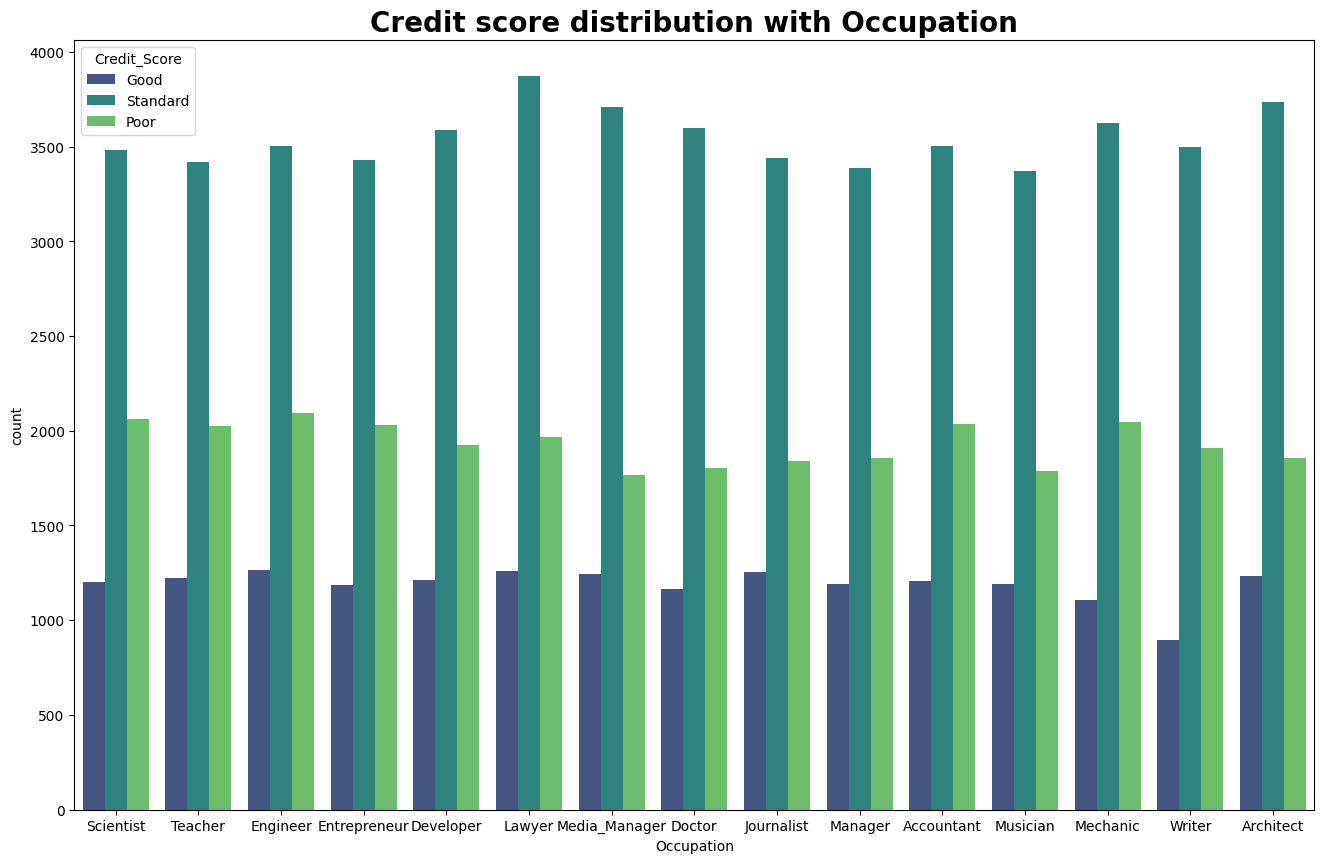

In [ ]:
plt.figure(figsize = (16,10))
sns.countplot(x='Occupation',data=data,hue='Credit_Score',palette='viridis')
plt.title('Credit score distribution with Occupation',fontsize = 20, fontweight = 'bold')
plt.show()

<ipython-input-13-f5cebfa41b6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Occupation', data=data, palette='hls')


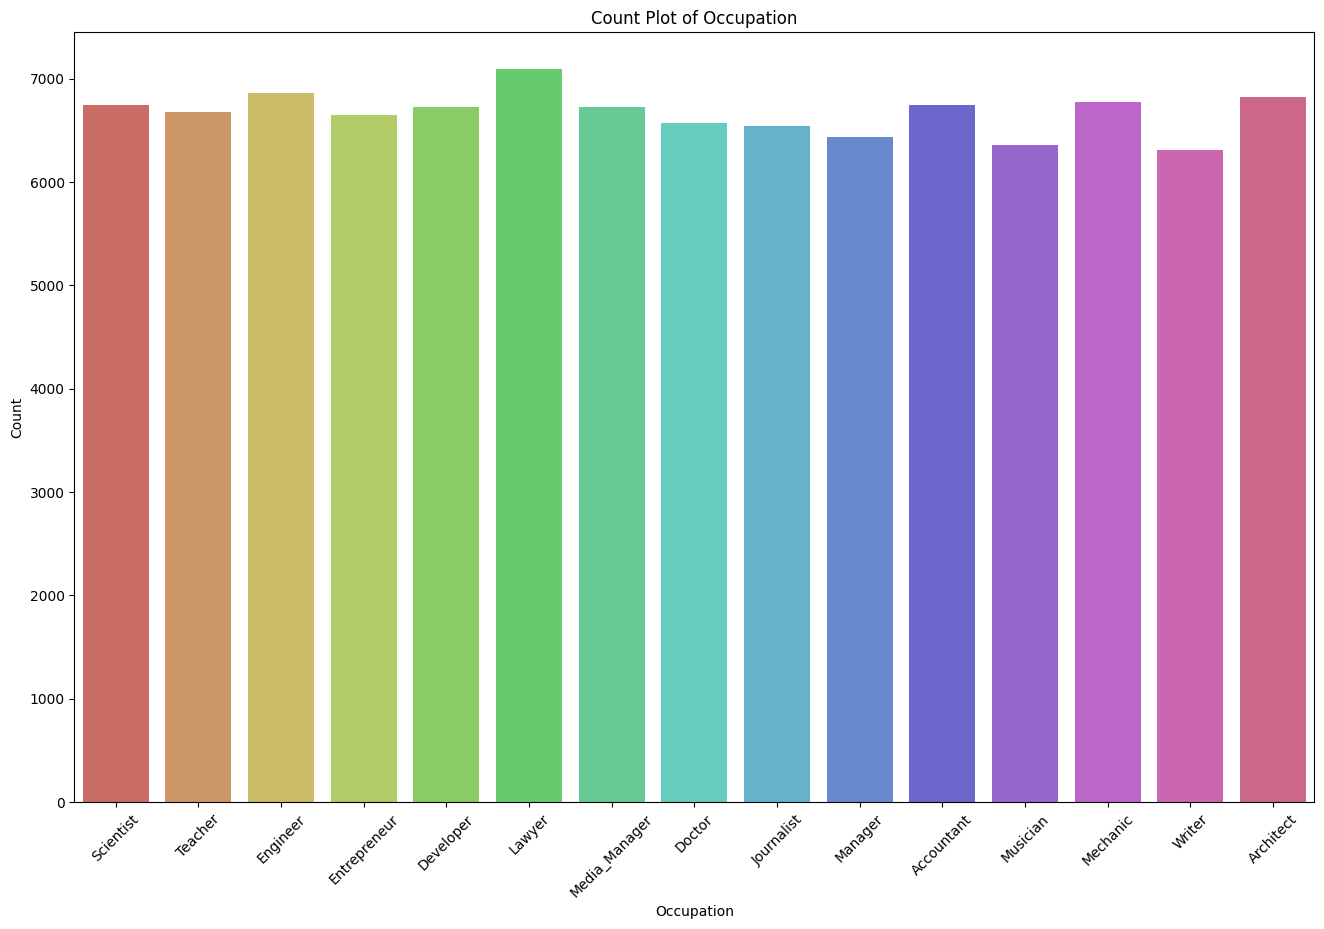

In [ ]:
plt.figure(figsize=(16,10))
sns.countplot(x='Occupation', data=data, palette='hls')
plt.xticks(rotation=45)
plt.title('Count Plot of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Total_EMI_per_month'>

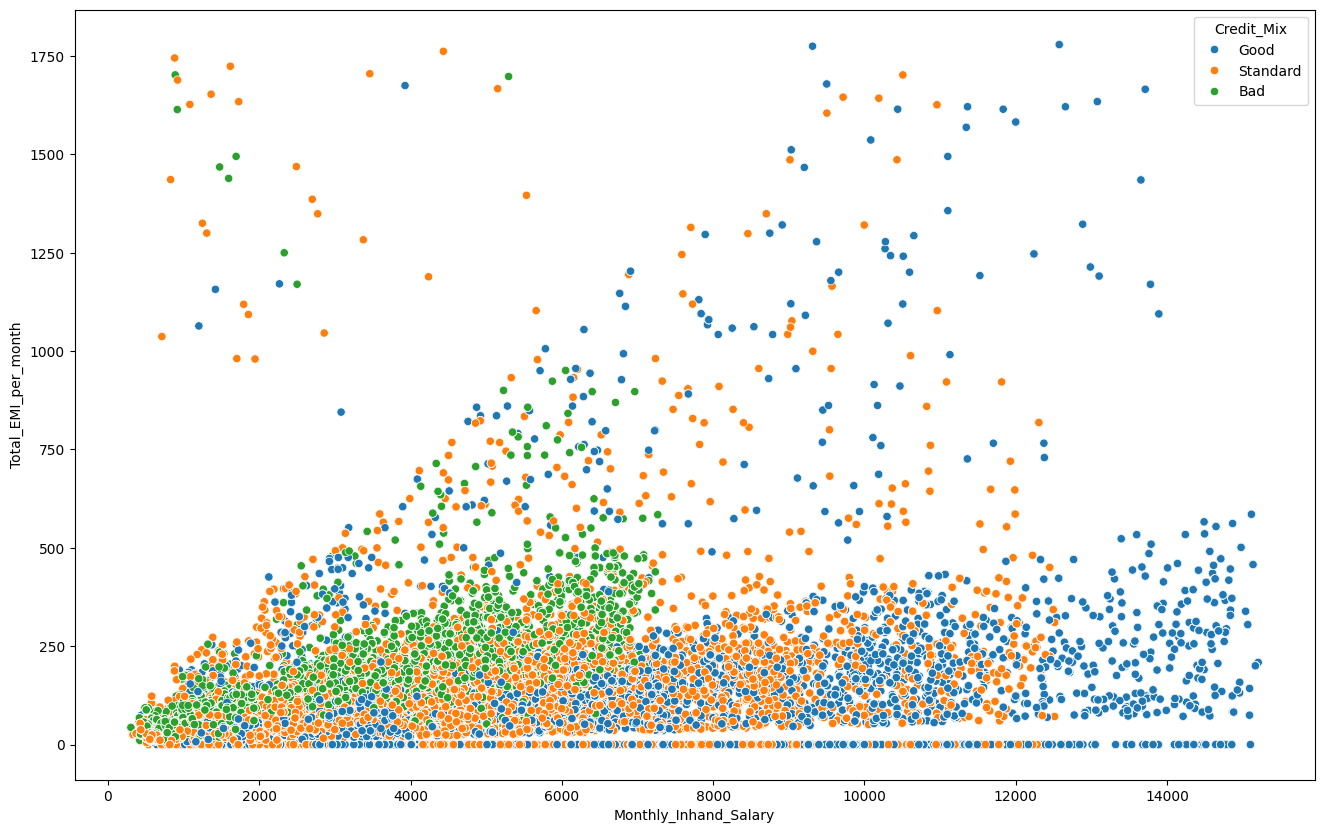

In [ ]:
plt.figure(figsize = (16,10))
sns.scatterplot(x='Monthly_Inhand_Salary',y='Total_EMI_per_month',data=data,hue='Credit_Mix')

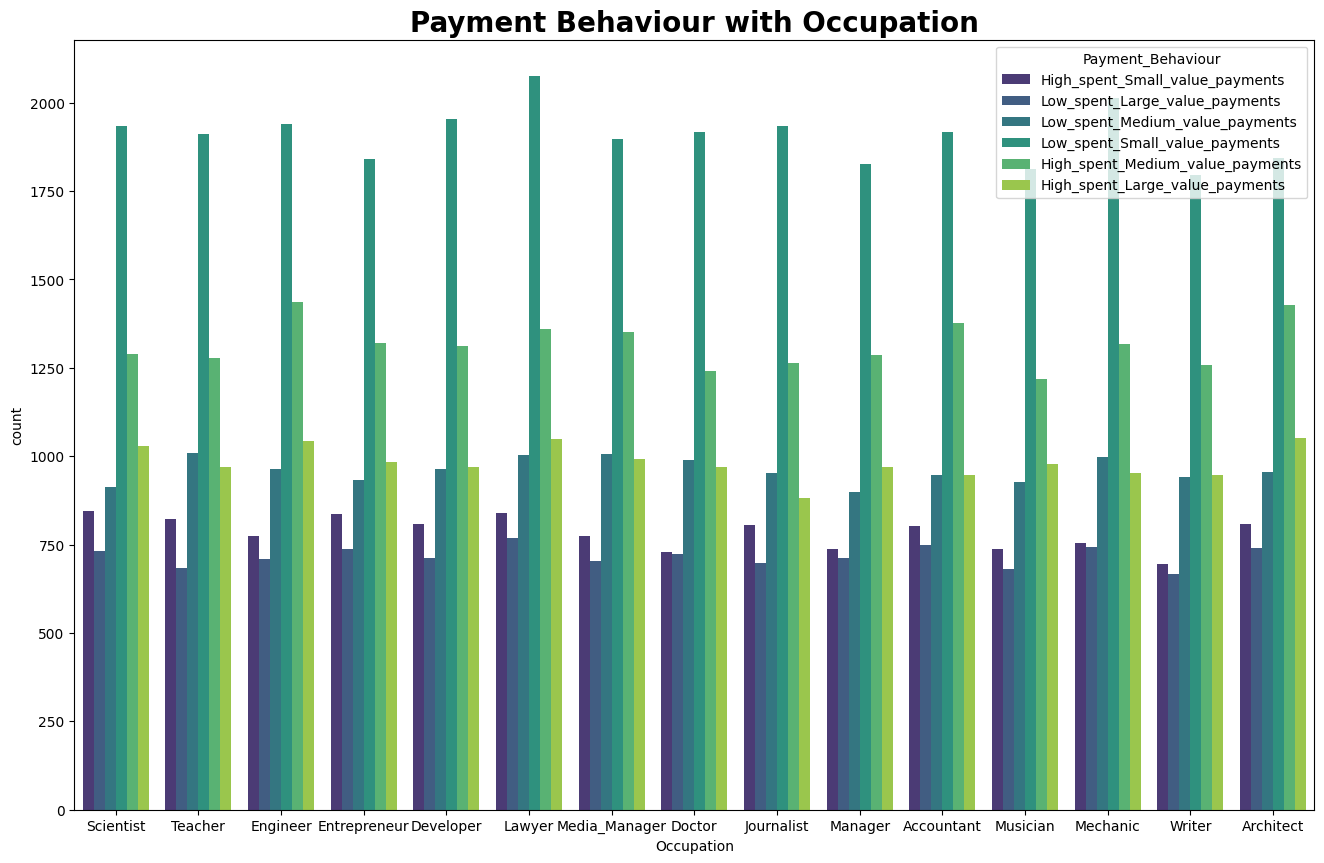

In [ ]:
plt.figure(figsize = (16,10))
sns.countplot(x='Occupation',data=data,hue='Payment_Behaviour',palette='viridis')
plt.title('Payment Behaviour with Occupation',fontsize = 20, fontweight = 'bold')
plt.show()

<ipython-input-16-835330e3fc5e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Occupation", y="Annual_Income", data=data, palette='hls', height=8, aspect=2)


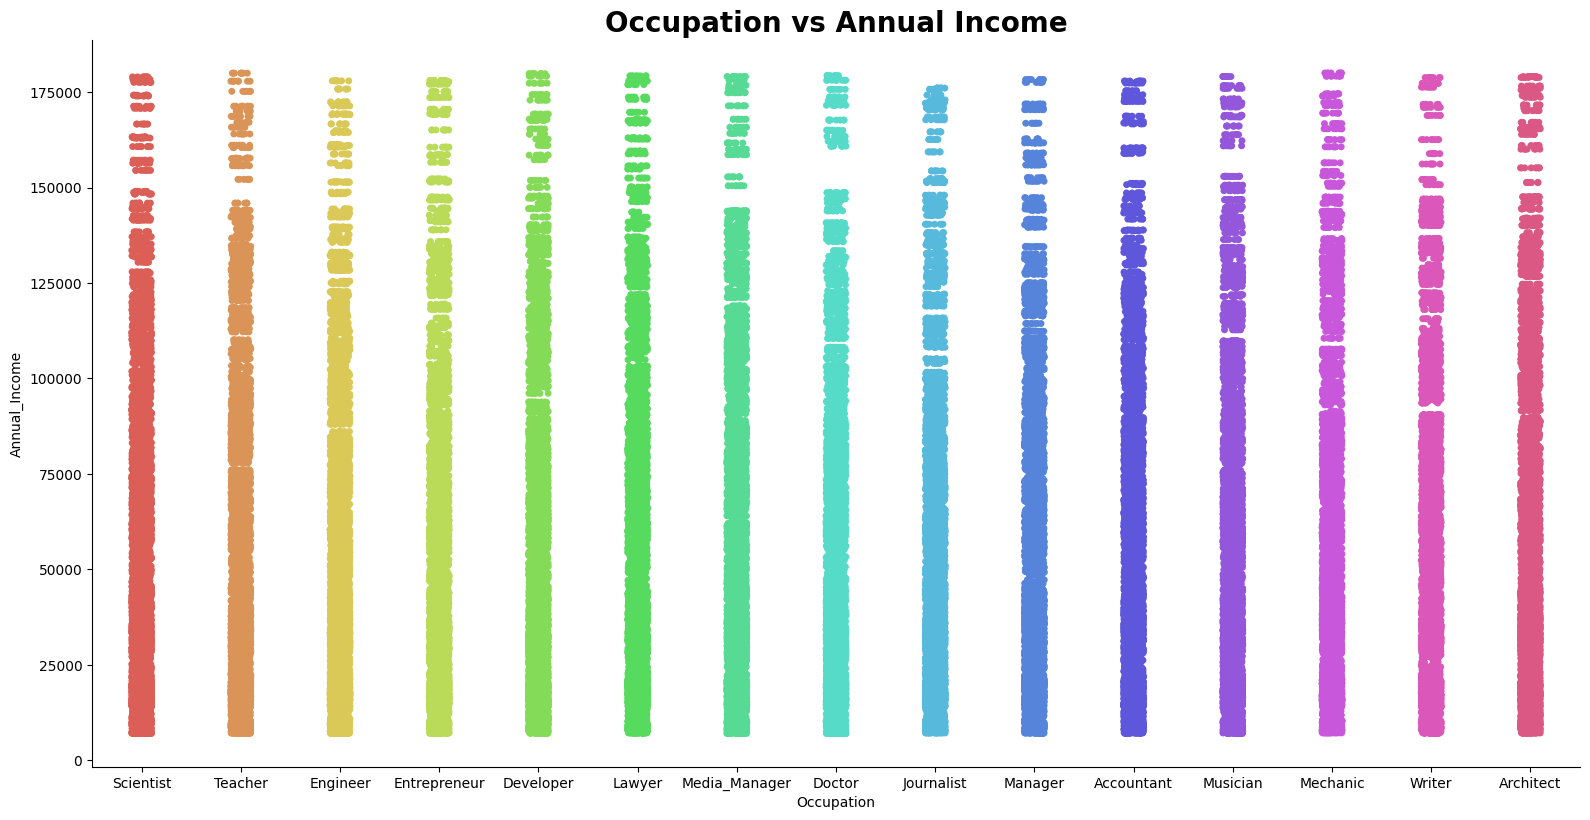

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Occupation", y="Annual_Income", data=data, palette='hls', height=8, aspect=2)
plt.title('Occupation vs Annual Income', fontsize=20, fontweight='bold')
plt.show()

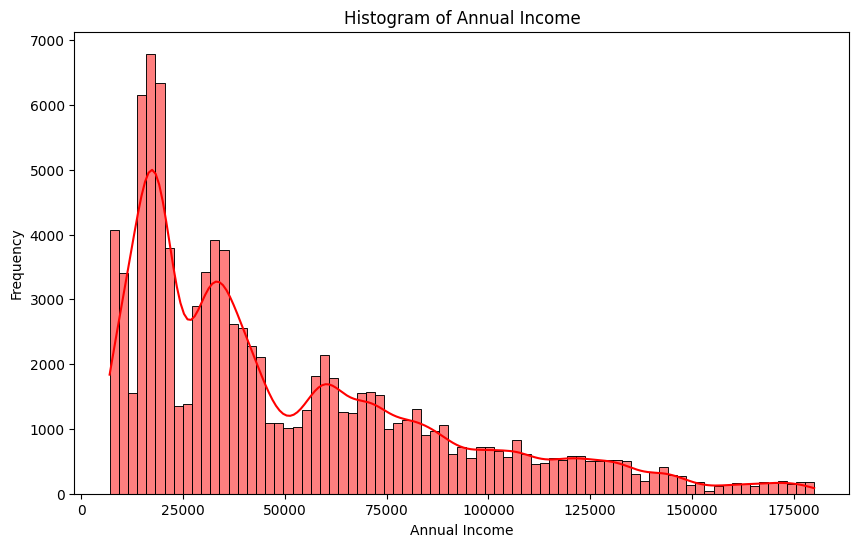

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Annual_Income'], kde=True, color='red')
plt.title('Histogram of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

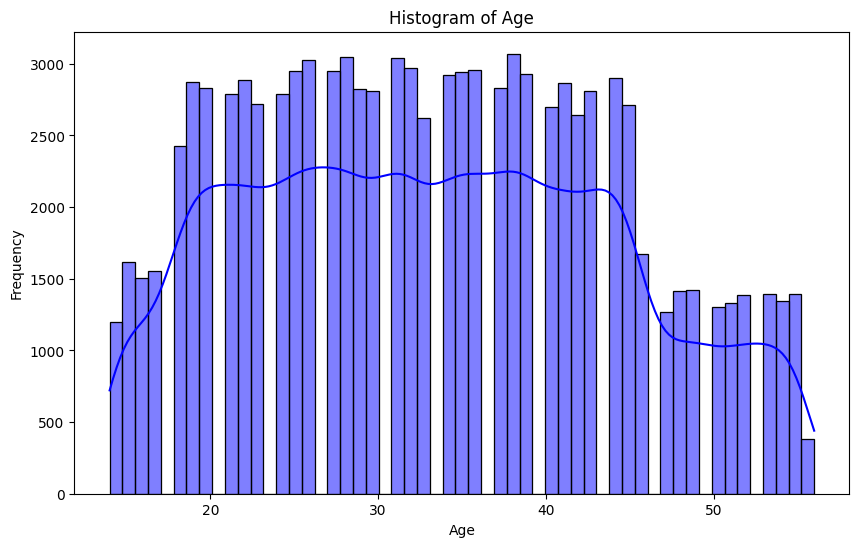

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-19-06e549f3aeca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Score', data=data, palette='viridis')


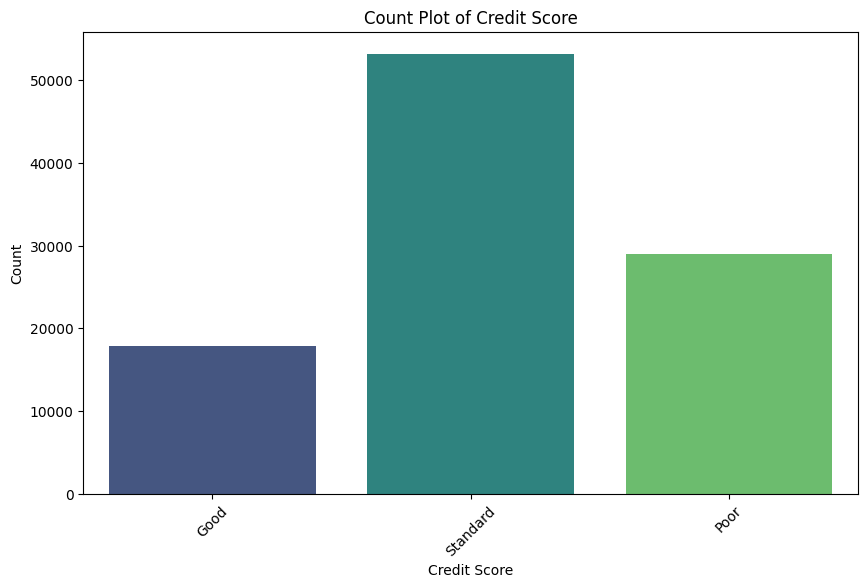

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', data=data, palette='viridis')
plt.xticks(rotation=45)
plt.title('Count Plot of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder()

In [ ]:
encoded_results = encoder.fit_transform(np.array(['Occupation','Credit_Score']).reshape(-1, 1)).toarray()

In [ ]:
X=data[['Occupation','Annual_Income','Monthly_Inhand_Salary','Num_Credit_Card','Num_of_Loan','Num_of_Delayed_Payment','Outstanding_Debt','Credit_Utilization_Ratio']]

In [ ]:
y=data['Credit_Score']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10,shuffle=True)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70000, 8) (70000,)
(30000, 8) (30000,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
print(f"X_train data type: {type(X_train)}")
print(f"y_train data type: {type(y_train)}")

X_train data type: <class 'pandas.core.frame.DataFrame'>
y_train data type: <class 'pandas.core.series.Series'>


In [ ]:
import pandas as pd

if isinstance(X_train, pd.DataFrame):
    print(f"Non-numeric values in X_train: {X_train.select_dtypes(include='object').columns.tolist()}")
if isinstance(y_train, pd.DataFrame):
    print(f"Non-numeric values in y_train: {y_train.select_dtypes(include='object').columns.tolist()}")

Non-numeric values in X_train: ['Occupation']


In [ ]:
from sklearn.preprocessing import LabelEncoder

if isinstance(X_train, pd.DataFrame):
    le = LabelEncoder()
    for col in X_train.select_dtypes(include='object'):
        X_train[col] = le.fit_transform(X_train[col])
if isinstance(y_train, pd.DataFrame):
    le = LabelEncoder()
    for col in y_train.select_dtypes(include='object'):
        y_train[col] = le.fit_transform(y_train[col])

1.KNN MODE


In [ ]:
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_test['Occupation'] = le.fit_transform(X_test['Occupation'])

In [ ]:
knn_predictions=knn_classifier.predict(X_test)

In [ ]:
knn_accuracy=accuracy_score(y_test,knn_predictions)

In [ ]:
print('Knearest accuracy:',knn_accuracy)

Knearest accuracy: 0.7878


In [ ]:
print("Classification Report (knn):")
print(classification_report(y_test,knn_predictions))

Classification Report (knn):
              precision    recall  f1-score   support

        Good       0.72      0.76      0.74      5252
        Poor       0.78      0.81      0.80      8771
    Standard       0.82      0.78      0.80     15977

    accuracy                           0.79     30000
   macro avg       0.77      0.79      0.78     30000
weighted avg       0.79      0.79      0.79     30000



2.RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.7695333333333333


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        Good       0.72      0.69      0.71      5252
        Poor       0.78      0.77      0.78      8771
    Standard       0.78      0.79      0.79     15977

    accuracy                           0.77     30000
   macro avg       0.76      0.75      0.76     30000
weighted avg       0.77      0.77      0.77     30000



3.SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC_classifier=SVC()

In [ ]:
SVC_classifier.fit(X_train,y_train)

SVC()

In [ ]:
SVC_predictions=SVC_classifier.predict(X_test)

In [ ]:
SVC_accuracy=accuracy_score(y_test,SVC_predictions)
print('Support Vector accuracy:',SVC_accuracy)

Support Vector accuracy: 0.5358


In [ ]:
print("Classification Report (SVM):")
print(classification_report(y_test, SVC_predictions))

Classification Report (SVM):
              precision    recall  f1-score   support

        Good       0.48      0.03      0.05      5252
        Poor       0.50      0.22      0.30      8771
    Standard       0.54      0.88      0.67     15977

    accuracy                           0.54     30000
   macro avg       0.51      0.37      0.34     30000
weighted avg       0.52      0.54      0.46     30000



CROSS VALIDATION

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = X.apply(le.fit_transform)

print(X.dtypes)

Occupation                  int64
Annual_Income               int64
Monthly_Inhand_Salary       int64
Num_Credit_Card             int64
Num_of_Loan                 int64
Num_of_Delayed_Payment      int64
Outstanding_Debt            int64
Credit_Utilization_Ratio    int64
dtype: object


In [ ]:
cv_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')

In [ ]:
cv_scores

array([0.7697 , 0.7666 , 0.76635, 0.7665 , 0.7685 ])

In [ ]:
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.7697  0.7666  0.76635 0.7665  0.7685 ]
Mean CV accuracy: 0.7675299999999999


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
y_probs = rf_classifier.predict_proba(X_test)[:, 1]

In [ ]:
y_probs = y_probs.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_probs, multi_class='ovo')
print('AUC:', auc)

AUC: 0.7090856713921555
